# Processing and Understanding Text

* Text Preprocessing and Wrangling
    1. Removing HTML Tags
    2. Text Tokenization
    3. Removing Accented Characters
    4. Expanding Contradictions
    5. Removing Special Characters
    6. Case Conversions
    7. Text Corrections
    8. Stemming
    9. Lemmatization
    10. Removing Stopwords
    11. Building a Text Normalizer

* Understanding Text Syntax and Structure
    1. Installing Necessary Dependencies
    2. Parts of Speech Tagging
    3. Shallow Parsing or Chunking
    4. Dependency Parsing
    5. Constituency Parsing

## Text Preprocessing and Wrangling


In [1]:
## Removing HTML Tags

import requests

data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.content

# hard to see content with html tags
print(content[1163:2200])

b'a name="generator" content="Ebookmaker 0.8.8 by Project Gutenberg"/>\r\n</head>\r\n  <body><p id="id00000">Project Gutenberg EBook The Bible, King James, Book 1: Genesis</p>\r\n\r\n<p id="id00001">Copyright laws are changing all over the world. Be sure to check the\r\ncopyright laws for your country before downloading or redistributing\r\nthis or any other Project Gutenberg eBook.</p>\r\n\r\n<p id="id00002">This header should be the first thing seen when viewing this Project\r\nGutenberg file.  Please do not remove it.  Do not change or edit the\r\nheader without written permission.</p>\r\n\r\n<p id="id00003">Please read the "legal small print," and other information about the\r\neBook and Project Gutenberg at the bottom of this file.  Included is\r\nimportant information about your specific rights and restrictions in\r\nhow the file may be used.  You can also find out about how to make a\r\ndonation to Project Gutenberg, and how to get involved.</p>\r\n\r\n<p id="id00004" style="mar

In [2]:
import re
from bs4 import BeautifulSoup

# remove unnecessary tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

clean_content = strip_html_tags(content)
print(clean_content[1163:2045])

*** START OF THE PROJECT GUTENBERG EBOOK, THE BIBLE, KING JAMES, BOOK 1***
This eBook was produced by David Widger
with the help of Derek Andrew's text from January 1992
and the work of Bryan Taylor in November 2002.
Book 01        Genesis
01:001:001 In the beginning God created the heaven and the earth.
01:001:002 And the earth was without form, and void; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.
01:001:003 And God said, Let there be light: and there was light.
01:001:004 And God saw the light, that it was good: and God divided the
           light from the darkness.
01:001:005 And God called the light Day, and the darkness he called
           Night. And the evening and the morning were the first day.
01:001:006 And God said, Let there be a firmament in the midst of the
           waters,


### Text Tokenization
* sentence tokenization
* default sentence tokenizer
* pretrained sentence tokenizer models
* punktsentencetokenizer
* regextokenizer

In [3]:
## Sentence Tokenizer

import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

# loading text corpora
alice = gutenberg.raw(fileids='carroll-alice.txt')
sample_text = ("US unveils world's most powerful supercomputer, beats China. " "The US Has unveiled the world's most powerful supercomputer called 'Summit, " "beating the previous record-holder China's Sunway TaihuLight. With a peak performance " "of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, " "which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, " "which reportedly take up the size of two tennis courts.")

sample_text

"US unveils world's most powerful supercomputer, beats China. The US Has unveiled the world's most powerful supercomputer called 'Summit, beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

In [4]:
# total characters in Alice in Wonderland
len(alice)

144395

In [5]:
# first 100 characters in the corpus
alice[0:100]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was"

In [6]:
## Default Sentence Tokenizer

default_st = nltk.sent_tokenize
alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)

print('Total sentences in sample text:', len(sample_sentences))
print('Sample text sentences :-')
print(np.array(sample_sentences))

print('\nTotal sentences in alice:', len(alice_sentences))
print('First 5 sentences in alice:-')
print(np.array(alice_sentences[0:5]))

Total sentences in sample text: 4
Sample text sentences :-
["US unveils world's most powerful supercomputer, beats China."
 "The US Has unveiled the world's most powerful supercomputer called 'Summit, beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']

Total sentences in alice: 1625
First 5 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"
 '

In [7]:
## Pretrained Sentence Tokenizer Models

from nltk.corpus import europarl_raw

german_text = europarl_raw.german.raw(fileids = 'ep-00-01-17.de')
# total characters in corpus
print(len(german_text))
# first 100 characters in the corpus
print(german_text[0:100])

157171
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit


In [8]:
# default sentence tokenizer
german_sentences_def = default_st(text=german_text, language='german')

# loading german text tokenizer into a PunktSentenceTokenizer instance
german_tokenizer = nltk.data.load(resource_url = 'tokenizers/punkt/german.pickle')
german_sentences = german_tokenizer.tokenize(german_text)

# verify the type of german_tokenizer
# should be PunktSentence Tokenizer
print(type(german_tokenizer))

<class 'nltk.tokenize.punkt.PunktSentenceTokenizer'>


In [9]:
# check if results of both tokenizers match
# should be True
print(german_sentences_def == german_sentences)

True


In [10]:
# print first 5 sentences of the corpus
print(np.array(german_sentences[:5]))

[' \nWiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .'
 'Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .'
 'Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .'
 'Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .'
 'Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .']


In [11]:
## PunktSentenceTokenizer

punkt_st = nltk.tokenize.PunktSentenceTokenizer()
sample_sentences = punkt_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US Has unveiled the world's most powerful supercomputer called 'Summit, beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


In [12]:
## RegexpTokenizer

SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'
regex_st = nltk.tokenize.RegexpTokenizer(pattern = SENTENCE_TOKENS_PATTERN, gaps=True)
sample_sentences = regex_st.tokenize(sample_text)
print(np.array(sample_sentences))

["US unveils world's most powerful supercomputer, beats China."
 "The US Has unveiled the world's most powerful supercomputer called 'Summit, beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']


In [13]:
## Word Tokenization

## Default Word Tokenizer
default_wt = nltk.word_tokenize
words = default_wt(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'Has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [14]:
## TreebankWordTokenizer

treebank_wt = nltk.TreebankWordTokenizer()
words = treebank_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'Has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [15]:
## TokTokTokenizer

from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
words = tokenizer.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China.', 'The', 'US', 'Has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'", 's', 'Sunway',
       'TaihuLight.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [16]:
## RegexpTokenizer

# pattern to identify tokens themselves
TOKEN_PATTERN = r'\w+'
regex_wt = nltk.RegexpTokenizer(pattern = TOKEN_PATTERN, gaps = False)

words = regex_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', 's', 'most', 'powerful', 'supercomputer',
       'beats', 'China', 'The', 'US', 'Has', 'unveiled', 'the', 'world',
       's', 'most', 'powerful', 'supercomputer', 'called', 'Summit',
       'beating', 'the', 'previous', 'record', 'holder', 'China', 's',
       'Sunway', 'TaihuLight', 'With', 'a', 'peak', 'performance', 'of',
       '200', '000', 'trillion', 'calculations', 'per', 'second', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       'which', 'is', 'capable', 'of', '93', '000', 'trillion',
       'calculations', 'per', 'second', 'Summit', 'has', '4', '608',
       'servers', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts'], dtype='<U13')

In [17]:
# pattern to identify tokens by using gaps between tokens
GAP_PATTERN = r'\s+'
regex_wt = nltk.RegexpTokenizer(pattern = GAP_PATTERN, gaps = True)

words = regex_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'Has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit,", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

In [18]:
# how to obtain token boundaries for each token
word_indices = list(regex_wt.span_tokenize(sample_text))
print(word_indices)
print(np.array([sample_text[start:end] for start, end in word_indices]))

[(0, 2), (3, 10), (11, 18), (19, 23), (24, 32), (33, 47), (48, 53), (54, 60), (61, 64), (65, 67), (68, 71), (72, 80), (81, 84), (85, 92), (93, 97), (98, 106), (107, 120), (121, 127), (128, 136), (137, 144), (145, 148), (149, 157), (158, 171), (172, 179), (180, 186), (187, 198), (199, 203), (204, 205), (206, 210), (211, 222), (223, 225), (226, 233), (234, 242), (243, 255), (256, 259), (260, 267), (268, 270), (271, 273), (274, 278), (279, 284), (285, 287), (288, 292), (293, 295), (296, 302), (303, 314), (315, 320), (321, 323), (324, 331), (332, 334), (335, 341), (342, 350), (351, 363), (364, 367), (368, 375), (376, 382), (383, 386), (387, 392), (393, 401), (402, 407), (408, 418), (419, 423), (424, 426), (427, 430), (431, 435), (436, 438), (439, 442), (443, 449), (450, 457)]
['US' 'unveils' "world's" 'most' 'powerful' 'supercomputer,' 'beats'
 'China.' 'The' 'US' 'Has' 'unveiled' 'the' "world's" 'most' 'powerful'
 'supercomputer' 'called' "'Summit," 'beating' 'the' 'previous'
 'record-hol

In [19]:
## Inherited Tokenizers from RegexpTokenizer

## WordPunktTokenizer
wordpunkt_wt = nltk.WordPunctTokenizer()
words = wordpunkt_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'Has',
       'unveiled', 'the', 'world', "'", 's', 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', ',', 'beating', 'the',
       'previous', 'record', '-', 'holder', 'China', "'", 's', 'Sunway',
       'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of', '200',
       ',', '000', 'trillion', 'calculations', 'per', 'second', ',', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       ',', 'which', 'is', 'capable', 'of', '93', ',', '000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4', ',',
       '608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [20]:
## WhitespaceTokenizer: tokenizes sentences into words based on whitespace
whitespace_wt = nltk.WhitespaceTokenizer()
words = whitespace_wt.tokenize(sample_text)
np.array(words)

array(['US', 'unveils', "world's", 'most', 'powerful', 'supercomputer,',
       'beats', 'China.', 'The', 'US', 'Has', 'unveiled', 'the',
       "world's", 'most', 'powerful', 'supercomputer', 'called',
       "'Summit,", 'beating', 'the', 'previous', 'record-holder',
       "China's", 'Sunway', 'TaihuLight.', 'With', 'a', 'peak',
       'performance', 'of', '200,000', 'trillion', 'calculations', 'per',
       'second,', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as',
       'Sunway', 'TaihuLight,', 'which', 'is', 'capable', 'of', '93,000',
       'trillion', 'calculations', 'per', 'second.', 'Summit', 'has',
       '4,608', 'servers,', 'which', 'reportedly', 'take', 'up', 'the',
       'size', 'of', 'two', 'tennis', 'courts.'], dtype='<U14')

In [21]:
## Building Robest Tokenizers with NLTK and spaCy

def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

sents = tokenize_text(sample_text)
np.array(sents)

array([list(['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.']),
       list(['The', 'US', 'Has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'Summit", ',', 'beating', 'the', 'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight', '.']),
       list(['With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.']),
       list(['Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.'])],
      dtype=object)

In [22]:
words = [word for sentence in sents for word in sentence]
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'Has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [23]:
# use spaCy
import spacy

nlp = spacy.load('en_core_web_sm', parse = True, tag = True, entity = True)

text_spacy = nlp(sample_text)

sents = np.array(list(text_spacy.sents))
sents

array([US unveils world's most powerful supercomputer, beats China.,
       The US Has unveiled the world's most powerful supercomputer called 'Summit, beating the previous record-holder China's Sunway TaihuLight.,
       With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.,
       Summit has 4,608 servers, which reportedly take up the size of two tennis courts.],
      dtype=object)

In [24]:
sent_words = [[word.text for word in sent] for sent in sents]
np.array(sent_words)

array([list(['US', 'unveils', 'world', "'s", 'most', 'powerful', 'supercomputer', ',', 'beats', 'China', '.']),
       list(['The', 'US', 'Has', 'unveiled', 'the', 'world', "'s", 'most', 'powerful', 'supercomputer', 'called', "'", 'Summit', ',', 'beating', 'the', 'previous', 'record', '-', 'holder', 'China', "'s", 'Sunway', 'TaihuLight', '.']),
       list(['With', 'a', 'peak', 'performance', 'of', '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it', 'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion', 'calculations', 'per', 'second', '.']),
       list(['Summit', 'has', '4,608', 'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size', 'of', 'two', 'tennis', 'courts', '.'])],
      dtype=object)

In [25]:
words = [word.text for word in text_spacy]
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'Has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'", 'Summit', ',', 'beating', 'the',
       'previous', 'record', '-', 'holder', 'China', "'s", 'Sunway',
       'TaihuLight', '.', 'With', 'a', 'peak', 'performance', 'of',
       '200,000', 'trillion', 'calculations', 'per', 'second', ',', 'it',
       'is', 'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight',
       ',', 'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

### Removing Accented Characters

* May be dealing with accented characters/letters especially if only want to be dealing with english langugae

* need to convert and standardize characters into ASCII characters

In [26]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('á')

'a'

### Expanding Contractions

* Contractions are tied to the type of auxiliary verbs, which gives us normal cotractions, negated contractions, and other special colloquial contractions that may not involve auxiliary

* because two or more words are observed in a contraction, opens up a whole new can of worms when trying to tokenize them or standardize the words

* following function uses expanded match function inside the main expand_contractions function to find each contraction that matches the regex pattern we create out of all contractions in our contractions_dict

In [27]:
from contractions import contractions_dict
import re

def expand_contractions(text, contraction_mapping=contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags = re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match)\
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


In [28]:
# test function
expand_contractions("Y'all can't expand contractions I'd think.")

'You all can not expand contractions I would think.'

### Removing Special Characters

* usually non-alphanumeric characters or even occasionally numeric characters

* kept remove_digits optional parameter in this case because may want to use in analysis

In [29]:
def remove_special_characters(text, remove_digits = False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

### Case Conversion

* may make things easier when matching specific words or tokens

In [30]:
# lowercase
text = 'The quick brown fox jumped over The Big Dog'
text.lower()

'the quick brown fox jumped over the big dog'

In [31]:
# uppercase
text.upper()

'THE QUICK BROWN FOX JUMPED OVER THE BIG DOG'

In [32]:
# title case
text.title()

'The Quick Brown Fox Jumped Over The Big Dog'

### Text Correction 

* incorrect: (1) having spelling mistakes, or (2) words with several letters repeated that do not contribute much to its overall significance: EX. "finally" vs "finalllyyy"

* main objective is to standardize different forms of these words to the correct form so that we don't lose vital information from different tokens in the text

Correcting Repeated Characters

* words could contain several repeating characters that could be due to incorrect spelling, slang language, or even people wanting to express strong emotions

* following method uses a combination of syntax of these words and then move on to semantics

* first step: identify repeated characters in a word using regex pattern; then use a substitution to remove the characters one by one

EX: "finalllyyy"

* the pattern r'(\w*)(\w)\2(\w*)' can be used to identify characters that occur twice among other characters in the word

* each step tries to eliminate one of the repeated characters using subsitution for the match with regex match groups

* keep iterating through the process until no repeated characters remain

In [33]:
old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_subsitute = r'\1\2\3'
step = 1

while True:
    # remove one repeated character
    new_word = repeat_pattern.sub(match_subsitute, old_word)

    if new_word != old_word:
        print('Step: {} Word: {}'.format(step, new_word))
        step += 1 # update step
        # update old word to last substituted word
        old_word = new_word
        continue
    
    else:
        print("Final word:", new_word)
        break

Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Step: 4 Word: finaly
Final word: finaly


* correct word was "finally" but algorithm kept going

* use WordNet corpus to check for valid words at each stage, then terminate the loop once its obtained


In [34]:
from nltk.corpus import wordnet

old_word = 'finalllyyy'
repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
match_subsitute = r'\1\2\3'
step = 1

while True:
    # check for semantically correct word
    if wordnet.synsets(old_word):
        print("Final correct word:", old_word)
        break
    
    # remove one repeated character
    new_word = repeat_pattern.sub(match_subsitute, old_word)
    
    if new_word != old_word:
        print('Step: {} Word: {}'.format(step, new_word))
        step += 1 # update step
        # update old word to last substitute state
        old_word = new_word
        continue
    
    else:
        print("Final word:", new_word)
        break

Step: 1 Word: finalllyy
Step: 2 Word: finallly
Step: 3 Word: finally
Final correct word: finally


* can build better version of code by writing the logic in a function and make more generic to deal with incorrect tokens from a list of tokens

* use the inner function replace() to emulate the behavior of algorithm that was illustrated earlier; then call it repeatedly on each token in a sentence in the outer function remove_repeated_character()

In [35]:
from nltk.corpus import wordnet

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_subsitute = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_subsitute, old_word)
        return replace(new_word) if new_word != old_word else new_word

    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

sample_sentence = 'My schooool is reallllyyy amaaazingggg'
correct_tokens = remove_repeated_characters(nltk.word_tokenize(sample_sentence))
' '.join(correct_tokens)

'My school is really amazing'

Correcting Spelling

* problem: incorrect or wrong spellings that occur due to human or machine (i.e auto correct) error

* obj: given a problematic word, want to find most likely correct form of the word

* approach: generate a set of candidate words that are near to our input word; select the most likely word from this set as the correct word

* use a corpus of correct English words in this context to identify the correct word based on its frequency in the corpus from our final set of candidates with the nearest distance to input word

* edit distance: measures the distance of how near or far a word is from our input word

In [36]:
import re, collections

def tokens(text):
    """
    Get all words from the corpus
    """
    return re.findall('[a-z]+', text.lower())

WORDS = tokens(open('Data/big.txt').read())
WORD_COUNTS = collections.Counter(WORDS)
# top 10 words in corpus
WORD_COUNTS.most_common(10)

[('the', 80030),
 ('of', 40025),
 ('and', 38313),
 ('to', 28766),
 ('in', 22050),
 ('a', 21155),
 ('that', 12512),
 ('he', 12401),
 ('was', 11410),
 ('it', 10681)]

In [37]:
# define three functions that compute sets of words that are zero, one, and two edits away from our input word
def edits0(word):
    """
    Return all strings that are zero edits away
    from the input word (i.e, the word itself).
    """
    return {word}

def edits1(word):
    """
    Return all strings that are one edit away
    from the input word.
    """
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    
    def splits(word):
        """
        Return a list of all possible (first, rest) pairs
        that the input word is made of.
        """
        return [(word[:i], word[i:]) for i in range(len(word)+1)]

    pairs = splits(word)
    deletes = [a+b[1:] for (a,b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a,b) in pairs if len(b) > 1]
    replaces = [a+c+b[1:] for (a,b) in pairs for c in alphabet if b]
    inserts = [a+c+b for (a,b) in pairs for c in alphabet]
        
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    """
    Return all strings that are two edits away
    from the input word.
    """
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

# known(): returns a subset of words from our candidate set of words obtained from edit functions based on whether they occur in our vocabulary dictionary WORD_COUNTS
def known(words):
    """
    Return the subset of words that are actually
    in our WORD_COUNTS dictionary.
    """
    return {w for w in words if w in WORD_COUNTS}

# input word
word = 'fianlly'

# zero edit distance from input word
edits0(word)


{'fianlly'}

In [38]:
# return null set since it is not a valid word
known(edits0(word))

set()

In [39]:
# one edit distance from input word
list(edits1(word))[1:10]

['fmianlly',
 'fpianlly',
 'ficnlly',
 'fiafnlly',
 'fianoly',
 'fkianlly',
 'fianelly',
 'pianlly',
 'fiynlly']

In [40]:
# get correct word from above set
known(edits1(word))

{'finally'}

In [41]:
# two edit distances from input words
list(edits2(word))[1:10]

['fxioanlly',
 'mianllk',
 'fiaonplly',
 'fidanlle',
 'fiaxnllry',
 'euanlly',
 'cfiaelly',
 'fnianllye',
 'fixnllcy']

In [42]:
# get correct words from above set
known(edits2(word))

{'faintly', 'finally', 'finely', 'frankly'}

In [43]:
# select candidate from list of words by giving high priority to words whose edit distances are the smallest from the input word

candidates = (known(edits0(word)) or
              known(edits1(word)) or
              known(edits2(word)) or
              [word])

candidates

{'finally'}

In [44]:
def correct(word):
    """
    Get the best correct spelling for the input word
    """
    # priority is for edit distance 0, then 1, then 2
    # else defaults to the input word itself
    candidates = (known(edits0(word)) or
                  known(edits1(word)) or
                  known(edits2(word)) or
                  [word])
    return max(candidates, key=WORD_COUNTS.get)

In [45]:
correct('fianlly')

'finally'

In [46]:
# however the function is case sensitive
correct('FIANLLY')

'FIANLLY'

In [47]:
def correct_match(match):
    """
    Spell-correct word in match,
    and preserve proper upper/lower/title case.
    """

    word = match.group()
    def case_of(text):
        """
        Return the case-function appropriate
        for text: upper, lower, title, or just str.:
        """
        return (str.upper if text.isupper() else
                str.lower if text.islower() else
                str.title if text.istitle() else
                str)
    return case_of(word)(correct(word.lower()))

def correct_text_generic(text):
    """
    Correct all the words within a text,
    returning the corrected text
    """
    return re.sub('[a-zA-Z]+', correct_match, text)


In [48]:
correct_text_generic('fianlly')

'finally'

In [49]:
correct_text_generic('FIANLLY')

'FINALLY'

In [50]:
# same algorithm can be used out-of-the-box in TextBlob library
from textblob import Word
w = Word('fianlly')
w.correct()

'finally'

In [51]:
# check spelling
w.spellcheck()

[('finally', 1.0)]

In [52]:
# another example
w = Word('flaot')
w.spellcheck()

[('flat', 0.85), ('float', 0.15)]

other libraries to check out

* PyEnchant

* autocorrect

* aspell-python

* DeepSpell

### Stemming

In [53]:
# Porter stemmer
from nltk.stem import PorterStemmer

ps = PorterStemmer()
ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

('jump', 'jump', 'jump')

In [54]:
ps.stem('lying')

'lie'

In [55]:
ps.stem('strange')

'strang'

In [56]:
# Lancaster Stemmer
from nltk.stem import LancasterStemmer

ls = LancasterStemmer()

ls.stem('jumping'), ls.stem('jumps'), ls.stem('jumped')

('jump', 'jump', 'jump')

In [57]:
ls.stem('lying')

'lying'

In [58]:
ls.stem('strange')

'strange'

In [59]:
# Regex based stemmer
from nltk.stem import RegexpStemmer

rs = RegexpStemmer('ing$|s$|ed$', min = 4)

rs.stem('jumping'), rs.stem('jumps'), rs.stem('jumped')

('jump', 'jump', 'jump')

In [60]:
rs.stem('lying')

'ly'

In [61]:
rs.stem('strange')

'strange'

In [62]:
# Snowball Stemmer
from nltk.stem import SnowballStemmer

ss = SnowballStemmer('german')
print('Supported Languages:', SnowballStemmer.languages)

Supported Languages: ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [63]:
# stemming on German words
# autobahnen -> cars
# autobahn -> car
ss.stem('autobahnen')

'autobahn'

In [64]:
# springen -> jumping
# spring -> jump
ss.stem('springen')

'spring'

In [65]:
# basic function that can be used for stemming text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

### Lemmatization

In [66]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('men', 'n'))

car
men


In [67]:
# lemmatize verbs
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

run
eat


In [68]:
# lemmatize adjectives
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

sad
fancy


In [69]:
# pos is important or else lemmatization will not be effective
# ineffective lemmatization
print(wnl.lemmatize('ate', 'n'))
print(wnl.lemmatize('fancier', 'v'))

ate
fancier


In [70]:
# SpaCy performs pos tagging and lemmatization w/o us worrying about whether we're using lemmatization properly
import spacy
nlp = spacy.load('en_core_web_sm', parse = True, tag = True, entity = True)
text = 'My system keeps crashing his crashed yesterday, ours crashes daily'

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

### Removing Stopwords

In [71]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]

    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer'

### Bringing It All Together: Building a Text Normalizer

In [72]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True, accented_char_removal=True,
                     text_lower_case=True, text_lemmatization = True, special_char_removal=True,
                     stopword_removal=True, remove_digits=True):
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and/or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        
        normalized_corpus.append(doc)

    return normalized_corpus

In [73]:
# use above function
{'Original': sample_text,
 'Processed': normalize_corpus([sample_text])[0]}

{'Original': "US unveils world's most powerful supercomputer, beats China. The US Has unveiled the world's most powerful supercomputer called 'Summit, beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts.",
 'Processed': 'us unveil world powerful supercomputer beat china us unveil world powerful supercomputer call summit beat previous record holder china sunway taihulight peak performance trillion calculation per second twice fast sunway taihulight capable trillion calculation per second summit server reportedly take size two tennis court'}

## Understanding Text Syntax and Structure

In [74]:
import nltk
# download all dependencies and corpora
# getting error - nltk.download('all', halt_on_error=False)


### Building POS Taggers

In [75]:
sentence = "US unveils world's most powerful supercomputer, beats China."

import pandas as pd
import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
sentence_nlp = nlp(sentence)

# POS tagging with Spacy
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,VBZ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.
Tag type,PROPN,VERB,NOUN,PART,ADV,ADJ,NOUN,PUNCT,VERB,PROPN,PUNCT


In [76]:
# POS tagging with nltk
import nltk
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag']).T

,0,1,2,3,4,5,6,7,8,9,10
Word,US,unveils,world,'s,most,powerful,supercomputer,",",beats,China,.
POS tag,NNP,JJ,NN,POS,RBS,JJ,NN,",",VBZ,NNP,.


In [77]:
# import data to train and evaluate taggers
from nltk.corpus import treebank
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print(train_data[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [78]:
# default tagger
from nltk.tag import DefaultTagger
dt = DefaultTagger('NN')

# accuracy on test data
dt.evaluate(test_data)

0.1454158195372253

In [79]:
# tagging our sample headline
dt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NN'),
 ('world', 'NN'),
 ("'s", 'NN'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NN'),
 ('China', 'NN'),
 ('.', 'NN')]

In [80]:
# regex tagger
from nltk.tag import RegexpTagger
# define regex tag patterns
patterns = [
    (r'.*ing$', 'VBG'), # gerund
    (r'.*ed$', 'VBD'), # simple past
    (r'.*es$', 'VBZ'), # 3rd singular present
    (r'.*ould$', 'MD'), # modals
    (r'.*\'s$', 'NN$'), # possessive nouns
    (r'.*s$', 'NNS'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN') # nouns (default)
]
rt = RegexpTagger(patterns)

# accuracy on test data
rt.evaluate(test_data)

0.24039113176493368

In [81]:
# tagging out sample headline
rt.tag(nltk.word_tokenize(sentence))

[('US', 'NN'),
 ('unveils', 'NNS'),
 ('world', 'NN'),
 ("'s", 'NN$'),
 ('most', 'NN'),
 ('powerful', 'NN'),
 ('supercomputer', 'NN'),
 (',', 'NN'),
 ('beats', 'NNS'),
 ('China', 'NN'),
 ('.', 'NN')]

In [82]:
# N gram taggers
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)

# testing performance of unigram tagger
print(ut.evaluate(test_data))
print(ut.tag(nltk.word_tokenize(sentence)))

0.8607803272340013
[('US', 'NNP'), ('unveils', None), ('world', 'NN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', None), ('China', 'NNP'), ('.', '.')]


In [83]:
# testing performance of bigram tagger
print(bt.evaluate(test_data))
print(bt.tag(nltk.word_tokenize(sentence)))

0.13466937748087907
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [84]:
# testing performance of trigram tagger
print(tt.evaluate(test_data))
print(tt.tag(nltk.word_tokenize(sentence)))

0.08064672281924679
[('US', None), ('unveils', None), ('world', None), ("'s", None), ('most', None), ('powerful', None), ('supercomputer', None), (',', None), ('beats', None), ('China', None), ('.', None)]


In [85]:
# combine all taggers: create chain of taggers where each tagger would fall back on a backoff tagger
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

ct = combined_tagger(train_data=train_data, taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)

# evaluate the new combined tagger with backoff taggers
print(ct.evaluate(test_data))
print(ct.tag(nltk.word_tokenize(sentence)))

0.9094781682641108
[('US', 'NNP'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'NNS'), ('China', 'NNP'), ('.', '.')]


In [86]:
# supervised classification algorithm
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger

nbt = ClassifierBasedPOSTagger(train=train_data, classifier_builder=NaiveBayesClassifier.train)

# evaluate tagger on test data and sample sentence
print(nbt.evaluate(test_data))
print(nbt.tag(nltk.word_tokenize(sentence)))

0.9306806079969019
[('US', 'PRP'), ('unveils', 'VBZ'), ('world', 'VBN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


### Shallow Parsing or Chunking

In [87]:
from nltk.corpus import treebank_chunk
data = treebank_chunk.chunked_sents()

train_data = data[:3500]
test_data = data[3500:]

# view sample data
print(train_data[7])

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [88]:
# chunking and chinking
from nltk.chunk import RegexpParser

# get POS tagged sentence
tagged_simple_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print('POS Tags:', tagged_simple_sent)

POS Tags: [('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  most/RBS
  (NP powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


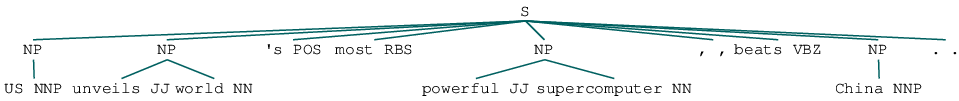

In [89]:
# illustrate NP chunking based on explicit chunk patterns
chunk_grammar = """
NP: {<DT>?<JJ>*<NN.*>}
"""

rc = RegexpParser(chunk_grammar)
c = rc.parse(tagged_simple_sent)

# print and view chunked sentence using chunking
print(c)
c

(S
  (NP US/NNP)
  unveils/JJ
  (NP world/NN 's/POS most/RBS)
  powerful/JJ
  (NP supercomputer/NN ,/,)
  beats/VBZ
  (NP China/NNP ./.))


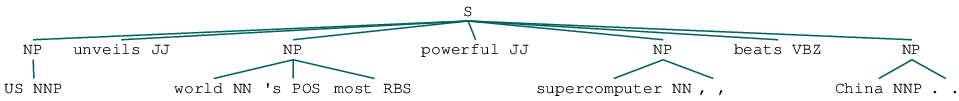

In [90]:
# illustrate NP chunking based on epxlicit chink patterns
chink_grammar = """
NP:
    {<.*>+} # chunk everything as NP
    }<VBZ|VBD|JJ|IN>+{ # chink sequence of VBD\VBZ\JJ\IN
"""
rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)

# print and view chunked sentence using chinking
print(c)
c

(S
  (NP US/NNP)
  (NP unveils/JJ world/NN)
  's/POS
  (ADVP most/RBS)
  (NP powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.)


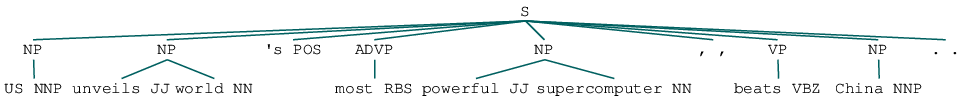

In [91]:
# create a more generic shallow parser
grammar = """
NP: {<DT>?<JJ>?<NN.*>}
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}
VP: {<MD>?<VB.*>+}
"""

rc = RegexpParser(grammar)
c = rc.parse(tagged_simple_sent)

# print and view shallow parsed sample sentence
print(c)
c

In [92]:
# Evaluate parser performance on test data
print(rc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  46.1%%
    Precision:     19.9%%
    Recall:        43.3%%
    F-Measure:     27.3%%


In [93]:
from nltk.chunk.util import tree2conlltags, conlltags2tree
# look at a sample training tagged sentence
train_sent = train_data[7]
print(train_sent)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [94]:
# get the (word, POS tag, Chunk tag) triples for each token
wtc = tree2conlltags(train_sent)
wtc

[('A', 'DT', 'B-NP'),
 ('Lorillard', 'NNP', 'I-NP'),
 ('spokewoman', 'NN', 'I-NP'),
 ('said', 'VBD', 'O'),
 (',', ',', 'O'),
 ('``', '``', 'O'),
 ('This', 'DT', 'B-NP'),
 ('is', 'VBZ', 'O'),
 ('an', 'DT', 'B-NP'),
 ('old', 'JJ', 'I-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [95]:
# get shallow parsed tree back from the WTC triples
tree = conlltags2tree(wtc)
print(tree)

(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [96]:
# extract POS and chunk tags from sentences with chunked annotations
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t,c) for (w,t,c) in sent] for sent in tagged_sents]

# reuse function from POs tagging to train multiple taggers with backoff taggers
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [97]:
# class that takes tagged sentences as training input, get WTC triples, and train bigram w/ unigramm as backoff tagger
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)


In [98]:
# train the shallow parser
ntc = NGramTagChunker(train_data)

# test parser performance on test data
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  97.2%%
    Precision:     91.4%%
    Recall:        94.3%%
    F-Measure:     92.8%%


(S
  (NP US/NNP)
  unveils/VBZ
  (NP world/NN 's/POS most/RBS powerful/JJ supercomputer/NN)
  ,/,
  beats/VBZ
  (NP China/NNP)
  ./.)


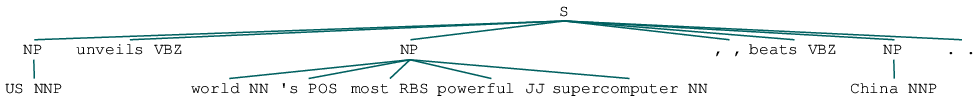

In [99]:
# parse our sample sentence
sentence_nlp = nlp(sentence)
tagged_sentence = [(word.text, word.tag_) for word in sentence_nlp]
tree = ntc.parse(tagged_sentence)
print(tree)
tree

In [100]:
# train and evaluate parser on corpus with Wall Street Journal excerpts
from nltk.corpus import conll2000
wsj_data = conll2000.chunked_sents()
train_wsj_data = wsj_data[:10000]
test_wsj_data = wsj_data[10000:]

# look at a sample sentence in the corpus
print(train_wsj_data[10])

(S
  (NP He/PRP)
  (VP reckons/VBZ)
  (NP the/DT current/JJ account/NN deficit/NN)
  (VP will/MD narrow/VB)
  (PP to/TO)
  (NP only/RB #/# 1.8/CD billion/CD)
  (PP in/IN)
  (NP September/NNP)
  ./.)


In [101]:
# train shallow parser
tc = NGramTagChunker(train_wsj_data)

# test performance on the test data
print(tc.evaluate(test_wsj_data))

ChunkParse score:
    IOB Accuracy:  89.1%%
    Precision:     80.3%%
    Recall:        86.1%%
    F-Measure:     83.1%%


(S
  (NP US/NNP)
  (VP unveils/VBZ)
  (NP world/NN)
  (NP 's/POS most/RBS powerful/JJ supercomputer/NN)
  ,/,
  (VP beats/VBZ)
  (NP China/NNP)
  ./.)


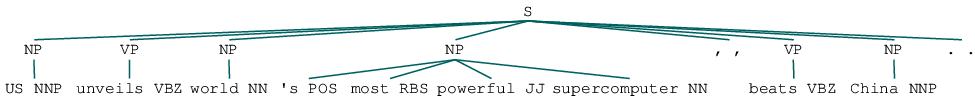

In [102]:
# parse our sample sentence
tree = tc.parse(tagged_sentence)
print(tree)
tree

### Dependency Parsing

In [103]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---US[nsubj]--->[]
--------
['US']<---unveils[ROOT]--->['supercomputer', ',', 'beats', '.']
--------
[]<---world[poss]--->["'s"]
--------
[]<---'s[case]--->[]
--------
[]<---most[advmod]--->[]
--------
['most']<---powerful[amod]--->[]
--------
['world', 'powerful']<---supercomputer[dobj]--->[]
--------
[]<---,[punct]--->[]
--------
[]<---beats[conj]--->['China']
--------
[]<---China[dobj]--->[]
--------
[]<---.[punct]--->[]
--------


In [104]:
from spacy import displacy
displacy.render(sentence_nlp, jupyter=True,
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

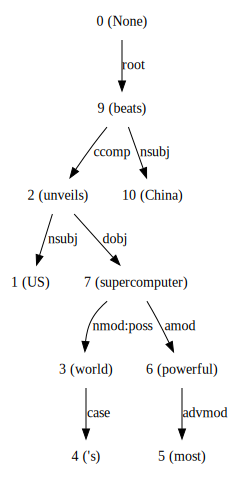

In [105]:
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='/Users/beliciarodriguez/stanford-parser-full-2018-10-17/stanford-parser.jar', path_to_models_jar='/Users/beliciarodriguez/stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar')

# perform dependency parsing
result = list(sdp.raw_parse(sentence))[0]

# generate annotated dependency parse tree
result

In [106]:
# generate dependency triples
[item for item in result.triples()]

[(('beats', 'VBZ'), 'ccomp', ('unveils', 'VBZ')),
 (('unveils', 'VBZ'), 'nsubj', ('US', 'NNP')),
 (('unveils', 'VBZ'), 'dobj', ('supercomputer', 'NN')),
 (('supercomputer', 'NN'), 'nmod:poss', ('world', 'NN')),
 (('world', 'NN'), 'case', ("'s", 'POS')),
 (('supercomputer', 'NN'), 'amod', ('powerful', 'JJ')),
 (('powerful', 'JJ'), 'advmod', ('most', 'RBS')),
 (('beats', 'VBZ'), 'nsubj', ('China', 'NNP'))]

In [107]:
# print simple dependency parse tree
dep_tree = result.tree()
print(dep_tree)

(beats (unveils US (supercomputer (world 's) (powerful most))) China)


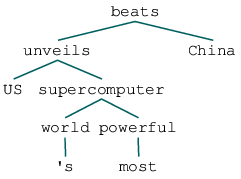

In [108]:
# visualize simple dependency parse tree
dep_tree

### Constituency Parsing

In [112]:
# set java path
# import os
# java_path = ?

# create parser object
from nltk.parse.stanford import StanfordParser
scp = StanfordParser(path_to_jar='/Users/beliciarodriguez/stanford-parser-full-2018-10-17/stanford-parser.jar', path_to_models_jar='/Users/beliciarodriguez/stanford-parser-full-2018-10-17/stanford-parser-3.9.2-models.jar')

# get parse tree
result = list(scp.raw_parse(sentence))[0]

# print the constituency parse tree
print(result)

(ROOT
  (SINV
    (S
      (NP (NNP US))
      (VP
        (VBZ unveils)
        (NP
          (NP (NN world) (POS 's))
          (ADJP (RBS most) (JJ powerful))
          (NN supercomputer))))
    (, ,)
    (VP (VBZ beats))
    (NP (NNP China))
    (. .)))


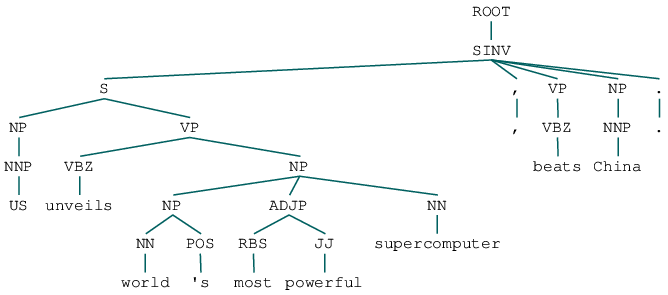

In [113]:
# visualize the parse tree
from IPython.display import display
display(result)

In [114]:
# build own parser
import nltk
from nltk.grammar import Nonterminal
from nltk.corpus import treebank

# load and view training data
training_set = treebank.parsed_sents()
print(training_set[1])

(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP Elsevier) (NNP N.V.))
          (, ,)
          (NP (DT the) (NNP Dutch) (VBG publishing) (NN group))))))
  (. .))


In [115]:
# extract the productions for all annotated training sentences
treebank_productions = list(set(production for sent in training_set for production in sent.productions()))

# view some production rules
treebank_productions[0:10]

[NP -> DT RB CD NNS,
 NP -> DT CC NN,
 NNS -> 'teams',
 VB -> 'parallel',
 VBD -> 'recovered',
 NN -> 'cardboard',
 NN -> 'denominator',
 S -> S : S : S : S,
 NN -> 'best-seller',
 NP -> NP PP-TMP VP]

In [116]:
# add productions for each word, POS tag
for word, tag in treebank.tagged_words():
    t = nltk.Tree.fromstring("("+ tag + " " + word +")")
    for production in t.productions():
        treebank_productions.append(production)

# build the PCFG based grammar
treebank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), treebank_productions)

# build the parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

# get sample sentence tokens
tokens = nltk.word_tokenize(sentence)

# get parse tree for sample sentence
result = list(viterbi_parser.parse(tokens))

ValueError: Grammar does not cover some of the input words: "'unveils', 'beats'".

In [117]:
# get tokens and their POS tags and check it
tagged_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print(tagged_sent)

[('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


In [121]:
# extend productions for sample sentence tokens
for word, tag in tagged_sent:
    t = nltk.Tree.fromstring("("+ tag + " " + word + ")")
    for production in t.productions():
        treebank_productions.append(production)

# rebuilt grammar
treebank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), treebank_productions)

# rebuild parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

# get parse tree for sample sentence
result = list(viterbi_parser.parse(tokens))[0]

# print parse tree
print(result)

(S
  (NP-SBJ-2
    (NP (NNP US))
    (NP
      (NP (JJ unveils) (NN world) (POS 's))
      (JJS most)
      (JJ powerful)
      (NN supercomputer)))
  (, ,)
  (VP (VBZ beats) (NP-TTL (NNP China)))
  (. .)) (p=4.18298e-42)


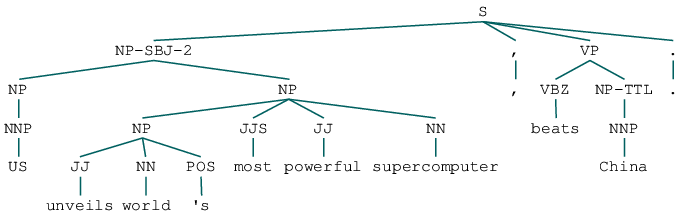

In [122]:
# visualize the parse tree
result